In [275]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as npb
from sklearn.model_selection import train_test_split



In [276]:

df = pd.read_csv(
    "../dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [277]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6587,7426-GSWPO,Male,1,No,No,64,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.50,6548.65,No
6871,4070-OKWVH,Female,0,Yes,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),94.60,5025.8,No
4011,8143-ETQTI,Female,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.65,451.55,No
5238,7841-FCRQD,Female,0,Yes,No,33,Yes,No,DSL,No,...,No,Yes,No,No,One year,Yes,Credit card (automatic),53.75,1857.3,No
1982,3190-FZATL,Male,0,No,Yes,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,268.4,No


In [278]:
#drop customer id, useless
df.drop('customerID', axis='columns',inplace=True)

In [279]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2576,Female,0,Yes,Yes,53,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),108.25,5935.1,No
5001,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2708,Female,1,No,No,13,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,1308.1,Yes
3594,Female,0,No,No,9,No,No phone service,DSL,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,40.75,359.4,No
4444,Female,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.85,63.75,Yes


In [280]:
for column in df:
    print (f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [281]:
df.replace('No internet service', 'No', inplace=True)

In [282]:
for column in df:
    print (f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [283]:
df.replace('No phone service','No',inplace=True)

In [284]:
for column in df:
    print (f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [285]:
#yes->1, no->0
df.replace({'Yes':1, 'No':0}, inplace=True)

In [286]:
df.InternetService.replace(0,'No',inplace=True)

In [287]:
df.gender.replace({'Male':0,'Female':1},inplace=True)

In [288]:
for column in df:
    print (f'{column} : {df[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


In [289]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [290]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [291]:
# pd.to_numeric(df.TotalCharges)

In [292]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,0,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,1,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,0,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,1,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,0,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,0,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,1,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,0,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,1,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,,0


In [293]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [294]:
df.shape

(7043, 20)

In [295]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [296]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [297]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [298]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [299]:
for column in df1:
    print (f'{column} : {df1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [300]:
#one-hot encoding
pd.get_dummies(data=df1, columns=['PaymentMethod'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,DSL,0,1,...,0,Month-to-month,1,29.85,29.85,0,0,0,1,0
1,0,0,0,0,34,1,0,DSL,1,0,...,0,One year,0,56.95,1889.50,0,0,0,0,1
2,0,0,0,0,2,1,0,DSL,1,1,...,0,Month-to-month,1,53.85,108.15,1,0,0,0,1
3,0,0,0,0,45,0,0,DSL,1,0,...,0,One year,0,42.30,1840.75,0,1,0,0,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,Month-to-month,1,70.70,151.65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,...,1,One year,1,84.80,1990.50,0,0,0,0,1
7039,1,0,1,1,72,1,1,Fiber optic,0,1,...,1,One year,1,103.20,7362.90,0,0,1,0,0
7040,1,0,1,1,11,0,0,DSL,1,0,...,0,Month-to-month,1,29.60,346.45,0,0,0,1,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,...,0,Month-to-month,1,74.40,306.60,1,0,0,0,1


In [301]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [302]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [303]:
df2 = pd.get_dummies(data=df1, columns=['PaymentMethod', 'Contract', 'InternetService'])

In [304]:
df2.columns.size

27

In [305]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [306]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [307]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
689,0,0,0,0,51,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2609,0,0,1,0,61,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
6200,1,0,1,1,59,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5984,0,0,1,0,14,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1782,1,1,0,0,26,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [308]:
df2.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [309]:
df2.Churn.unique()

array([0, 1])

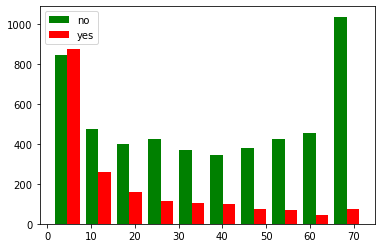

In [310]:
tenure_churn_no = df2[df2.Churn==0].tenure
tenure_churn_yes = df2[df2.Churn==1].tenure

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green', 'red'], label=['no','yes'])
plt.legend()
plt.show()

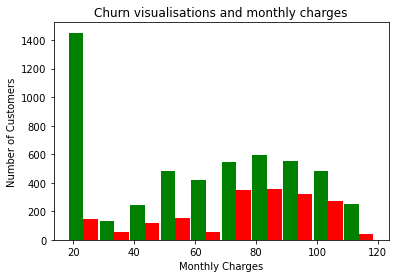

In [311]:
monthly_charges_no = df2[df2.Churn==0].MonthlyCharges
monthly_charges_yes = df2[df2.Churn==1].MonthlyCharges


plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Churn visualisations and monthly charges')

plt.hist([monthly_charges_no, monthly_charges_yes], rwidth=0.95, color=['green', 'red'], label=['No', 'Yes'])
plt.show()

In [312]:
df2.columns.shape

(27,)

In [313]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check 

In [314]:
train_cols = df2.drop('Churn', axis='columns').columns
print(train_cols)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


In [315]:
churn = df2.loc[:, df2.columns == "Churn"].columns
print(churn)

Index(['Churn'], dtype='object')


In [316]:
train_cols = df2.drop('Churn', axis='columns').columns
X = df2[train_cols]
y = df2[churn]

X.values[:5]

array([[1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 2.98500e+01,
        2.98500e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.40000e+01,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.69500e+01,
        1.88950e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 5.38500e+01,
       

In [317]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [318]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [319]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [320]:
y.shape

(7032, 1)

In [321]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)

In [322]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
1038,0,0,1,0,56,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1016,0,0,1,0,71,1,1,1,1,1,...,0,0,0,1,0,0,1,1,0,0
3255,1,1,1,1,66,1,1,1,1,0,...,0,1,0,0,0,1,0,0,1,0
6381,0,0,0,1,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
6296,1,1,1,0,31,0,0,1,1,1,...,0,1,0,0,0,1,0,1,0,0


In [323]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
1038,0,0,1,0,56,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1016,0,0,1,0,71,1,1,1,1,1,...,0,0,0,1,0,0,1,1,0,0
3255,1,1,1,1,66,1,1,1,1,0,...,0,1,0,0,0,1,0,0,1,0
6381,0,0,0,1,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
6296,1,1,1,0,31,0,0,1,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
5349,0,0,1,1,69,1,1,1,1,1,...,1,0,0,0,0,0,1,0,1,0
5889,0,1,1,0,59,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1999,0,0,0,0,23,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [324]:
from sklearn import preprocessing


In [325]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train.to_numpy())
X_test = scaler.transform(X_test.to_numpy())




In [326]:
# X_train.head()

In [327]:
X_train = pd.DataFrame(X_train, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'])

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,-0.988862,-0.436147,1.037872,-0.652853,0.962182,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
1,-0.988862,-0.436147,1.037872,-0.652853,1.573462,0.326209,1.168943,1.590935,1.374971,1.385843,...,-0.529572,-0.525993,-0.710504,1.835927,-1.106435,-0.512194,1.770884,1.386390,-0.887685,-0.526543
2,1.011263,2.292804,1.037872,1.531738,1.369702,0.326209,1.168943,1.590935,1.374971,-0.721582,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
3,-0.988862,-0.436147,-0.963510,1.531738,-1.279178,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,-0.710504,1.835927,0.903803,-0.512194,-0.564690,-0.721298,-0.887685,1.899179
4,1.011263,2.292804,1.037872,-0.652853,-0.056618,-3.065520,-0.855474,1.590935,1.374971,1.385843,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,1.386390,-0.887685,-0.526543


In [328]:
X_test = pd.DataFrame(X_test, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'])

X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1.011263,2.292804,-0.963510,-0.652853,1.288198,-3.065520,-0.855474,-0.628561,1.374971,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,0.903803,-0.512194,-0.564690,1.386390,-0.887685,-0.526543
1,-0.988862,-0.436147,1.037872,-0.652853,-0.993914,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,1.888318,-0.525993,-0.710504,-0.544684,0.903803,-0.512194,-0.564690,-0.721298,-0.887685,1.899179
2,1.011263,-0.436147,1.037872,1.531738,0.106390,0.326209,1.168943,-0.628561,-0.727288,-0.721582,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,-0.512194,1.770884,-0.721298,-0.887685,1.899179
3,1.011263,-0.436147,1.037872,-0.652853,0.717670,0.326209,1.168943,1.590935,1.374971,-0.721582,...,1.888318,-0.525993,-0.710504,-0.544684,0.903803,-0.512194,-0.564690,-0.721298,1.126526,-0.526543
4,-0.988862,-0.436147,-0.963510,1.531738,-1.156922,0.326209,1.168943,-0.628561,1.374971,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,0.903803,-0.512194,-0.564690,-0.721298,1.126526,-0.526543


In [329]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,-0.988862,-0.436147,1.037872,-0.652853,0.962182,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
1,-0.988862,-0.436147,1.037872,-0.652853,1.573462,0.326209,1.168943,1.590935,1.374971,1.385843,...,-0.529572,-0.525993,-0.710504,1.835927,-1.106435,-0.512194,1.770884,1.386390,-0.887685,-0.526543
2,1.011263,2.292804,1.037872,1.531738,1.369702,0.326209,1.168943,1.590935,1.374971,-0.721582,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
3,-0.988862,-0.436147,-0.963510,1.531738,-1.279178,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,-0.710504,1.835927,0.903803,-0.512194,-0.564690,-0.721298,-0.887685,1.899179
4,1.011263,2.292804,1.037872,-0.652853,-0.056618,-3.065520,-0.855474,1.590935,1.374971,1.385843,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,1.386390,-0.887685,-0.526543


In [330]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1.011263,2.292804,-0.963510,-0.652853,1.288198,-3.065520,-0.855474,-0.628561,1.374971,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,0.903803,-0.512194,-0.564690,1.386390,-0.887685,-0.526543
1,-0.988862,-0.436147,1.037872,-0.652853,-0.993914,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,1.888318,-0.525993,-0.710504,-0.544684,0.903803,-0.512194,-0.564690,-0.721298,-0.887685,1.899179
2,1.011263,-0.436147,1.037872,1.531738,0.106390,0.326209,1.168943,-0.628561,-0.727288,-0.721582,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,-0.512194,1.770884,-0.721298,-0.887685,1.899179
3,1.011263,-0.436147,1.037872,-0.652853,0.717670,0.326209,1.168943,1.590935,1.374971,-0.721582,...,1.888318,-0.525993,-0.710504,-0.544684,0.903803,-0.512194,-0.564690,-0.721298,1.126526,-0.526543
4,-0.988862,-0.436147,-0.963510,1.531738,-1.156922,0.326209,1.168943,-0.628561,1.374971,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,0.903803,-0.512194,-0.564690,-0.721298,1.126526,-0.526543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,-0.988862,-0.436147,-0.963510,-0.652853,-1.238426,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,0.903803,-0.512194,-0.564690,1.386390,-0.887685,-0.526543
1403,1.011263,-0.436147,1.037872,-0.652853,0.595414,0.326209,1.168943,-0.628561,-0.727288,1.385843,...,-0.529572,-0.525993,1.407452,-0.544684,0.903803,-0.512194,-0.564690,-0.721298,1.126526,-0.526543
1404,1.011263,2.292804,1.037872,-0.652853,0.921430,0.326209,1.168943,-0.628561,-0.727288,-0.721582,...,1.888318,-0.525993,-0.710504,-0.544684,0.903803,-0.512194,-0.564690,1.386390,-0.887685,-0.526543
1405,-0.988862,-0.436147,-0.963510,-0.652853,-0.504890,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,1.901168,-0.710504,-0.544684,0.903803,-0.512194,-0.564690,-0.721298,1.126526,-0.526543


# ExplainableBoostingClassifier

In [331]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,-0.988862,-0.436147,1.037872,-0.652853,0.962182,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
1,-0.988862,-0.436147,1.037872,-0.652853,1.573462,0.326209,1.168943,1.590935,1.374971,1.385843,...,-0.529572,-0.525993,-0.710504,1.835927,-1.106435,-0.512194,1.770884,1.386390,-0.887685,-0.526543
2,1.011263,2.292804,1.037872,1.531738,1.369702,0.326209,1.168943,1.590935,1.374971,-0.721582,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
3,-0.988862,-0.436147,-0.963510,1.531738,-1.279178,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,-0.710504,1.835927,0.903803,-0.512194,-0.564690,-0.721298,-0.887685,1.899179
4,1.011263,2.292804,1.037872,-0.652853,-0.056618,-3.065520,-0.855474,1.590935,1.374971,1.385843,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,1.386390,-0.887685,-0.526543


In [332]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,-0.988862,-0.436147,1.037872,-0.652853,0.962182,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
1,-0.988862,-0.436147,1.037872,-0.652853,1.573462,0.326209,1.168943,1.590935,1.374971,1.385843,...,-0.529572,-0.525993,-0.710504,1.835927,-1.106435,-0.512194,1.770884,1.386390,-0.887685,-0.526543
2,1.011263,2.292804,1.037872,1.531738,1.369702,0.326209,1.168943,1.590935,1.374971,-0.721582,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
3,-0.988862,-0.436147,-0.963510,1.531738,-1.279178,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,-0.710504,1.835927,0.903803,-0.512194,-0.564690,-0.721298,-0.887685,1.899179
4,1.011263,2.292804,1.037872,-0.652853,-0.056618,-3.065520,-0.855474,1.590935,1.374971,1.385843,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,1.386390,-0.887685,-0.526543


In [333]:
X1_train = X_train
X_train = X_train.to_numpy()
y1_train = y_train
y_train = y_train.to_numpy()

In [336]:
X1_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,-0.988862,-0.436147,1.037872,-0.652853,0.962182,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,1.407452,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
1,-0.988862,-0.436147,1.037872,-0.652853,1.573462,0.326209,1.168943,1.590935,1.374971,1.385843,...,-0.529572,-0.525993,-0.710504,1.835927,-1.106435,-0.512194,1.770884,1.386390,-0.887685,-0.526543
2,1.011263,2.292804,1.037872,1.531738,1.369702,0.326209,1.168943,1.590935,1.374971,-0.721582,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,-0.721298,1.126526,-0.526543
3,-0.988862,-0.436147,-0.963510,1.531738,-1.279178,0.326209,-0.855474,-0.628561,-0.727288,-0.721582,...,-0.529572,-0.525993,-0.710504,1.835927,0.903803,-0.512194,-0.564690,-0.721298,-0.887685,1.899179
4,1.011263,2.292804,1.037872,-0.652853,-0.056618,-3.065520,-0.855474,1.590935,1.374971,1.385843,...,-0.529572,1.901168,-0.710504,-0.544684,-1.106435,1.952384,-0.564690,1.386390,-0.887685,-0.526543


In [340]:
X1_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [341]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No']

In [342]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier(feature_names=columns, random_state=seed)
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['gender', 'SeniorCitizen',
                                             'Partner', 'Dependents', 'tenure',
                                             'PhoneService', 'MultipleLines',
                                             'OnlineSecurity', 'OnlineBackup',
                                             'DeviceProtection', 'TechSupport',
                                             'StreamingTV', 'StreamingMovies',
                                             'PaperlessBilling',
                                             'MonthlyCharges', 'TotalCharges',
                                             'PaymentMethod_Bank transfer '
                                             '(automatic)',
                                             'PaymentMethod_Credit card '
                                             '...
                                             'continuous', 'continuous',
                                             'continuou

In [343]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

In [344]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)


In [ ]:
ebm.score(X_train, y_train)

In [ ]:
ebm_local = ebm.explain_local(X_test[:2], y_test[:2])
show(ebm_local)

In [ ]:
ebm.score(X_test, y_test)

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

# LogisticRegression

In [ ]:
from interpret.glassbox import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=seed)
lr.fit(X_train, y_train)

lr_global = lr.explain_global()
show(lr_global)

lr_local = lr.explain_local(X_test[:5], y_test[:5])
show(lr_local)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

# ClassificationTree 

In [ ]:
from interpret.glassbox import ClassificationTree


In [ ]:
dt = ClassificationTree(random_state=seed, feature_names=)
dt.fit(X_train, y_train)

dt_global = dt.explain_global()
show(dt_global)

dt_local = dt.explain_local(X_test[:5], y_test[:5])
show(dt_local)

In [ ]:
dt.score(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)

# DecisionListClassifier

In [ ]:
from interpret.glassbox import DecisionListClassifier


In [ ]:
dl = DecisionListClassifier(random_state=seed)
dl.fit(X_train, y_train)

dl_global = dl.explain_global()
show(dl_global)

dl_local = dl.explain_local(X_test[:5], y_test[:5])
show(dl_local)

In [ ]:
dl.score(X_train, y_train)

In [ ]:
dl.score(X_test, y_test)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import ShapKernel

In [ ]:
pca = PCA()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

shap = ShapKernel(predict_fn=blackbox_model.predict_proba, data=X_train)
shap_local = shap.explain_local(X_test[:5], y_test[:5])

show(shap_local)

In [ ]:
blackbox_model.score(X_train, y_train)

In [ ]:
blackbox_model.score(X_test, y_test)

In [ ]:
from interpret.blackbox import LimeTabular


In [ ]:
pca = PCA()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

lime = LimeTabular(predict_fn=blackbox_model.predict_proba, data=X_train)
lime_local = lime.explain_local(X_test[:5], y_test[:5])

show(lime_local)

In [ ]:
blackbox_model.score(X_train, y_train)

In [ ]:
from interpret.blackbox import PartialDependence


In [ ]:
# pca = PCA()
# rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
# blackbox_model.fit(X_train, y_train)

# pdp = PartialDependence(predict_fn=blackbox_model.predict_proba, data=X_train)
# pdp_global = pdp.explain_global()

# show(pdp_global)

In [ ]:
from interpret.blackbox import MorrisSensitivity

In [ ]:
pca = PCA()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

msa = MorrisSensitivity(predict_fn=blackbox_model.predict_proba, data=X_train)
msa_global = msa.explain_global()

show(msa_global)